In [1]:
import utils
import ipywidgets as widgets
import A1.models as A1, A2.models as A2, B1.models as B1, B2.models as B2

Each task uses a different comibination of dataset, feature_col, file_col, and module:

In [2]:
TASKS = {'A1':('celeba',2,1,A1), 'A2':('celeba',3,1,A2), 'B1':('cartoon_set',2,3,B1),'B2':('cartoon_set',1,3,B2)}
task = widgets.RadioButtons(options=TASKS, description='Task')

In [3]:
task

RadioButtons(description='Task', options={'A1': ('celeba', 2, 1, <module 'A1.models' from '/Users/marc/Project…

celeba:   0%|          | 0/5000 [00:00<?, ?it/s]

Loaded 31,500,000 bytes


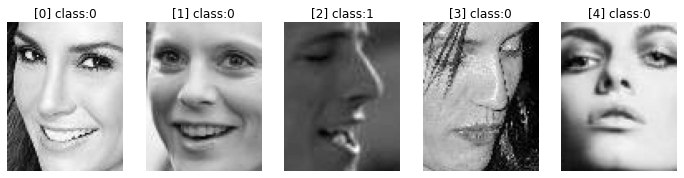

celeba_test:   0%|          | 0/1000 [00:00<?, ?it/s]

Loaded 6,300,000 bytes


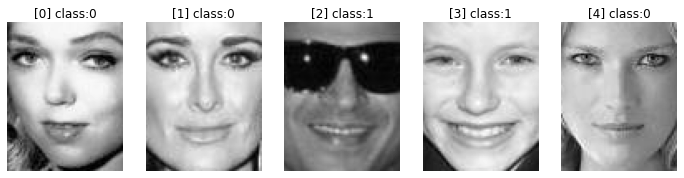

In [4]:
dataset, feature_col, file_col, models = task.value
X, y = utils.load_data(dataset, feature_col, file_col, models.load_image)
X_test, y_test = utils.load_data(dataset, feature_col, file_col, models.load_image, test=True)

In [254]:
opts = {**A1.options, **A2.options, **B1.options, **B2.options}
selected = list(models.options.values())[0]
options = widgets.Dropdown(options=opts, value=selected, description='Model', layout=widgets.Layout(width='70%'))

In [255]:
options

Dropdown(description='Model', layout=Layout(width='70%'), options={'*Best A1: PCA & SVC with CV optimised para…

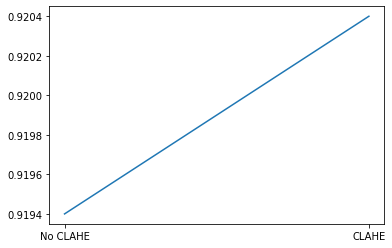

Peforming Cross Validation on optimal svc__kernel...


cross validation:   0%|          | 0/4 [00:00<?, ?it/s]

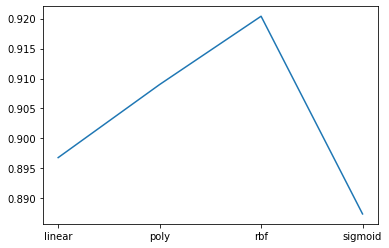

Optimal svc__kernel is rbf
Peforming Cross Validation on optimal svc__C...


cross validation:   0%|          | 0/3 [00:00<?, ?it/s]

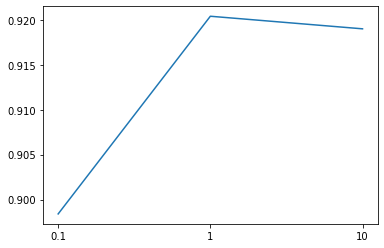

Optimal svc__C is 1
Peforming Cross Validation on optimal svc__gamma...


cross validation:   0%|          | 0/3 [00:00<?, ?it/s]

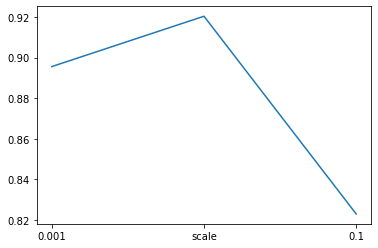

Optimal svc__gamma is scale
Peforming Cross Validation on optimal pca__n_components...


cross validation:   0%|          | 0/4 [00:00<?, ?it/s]

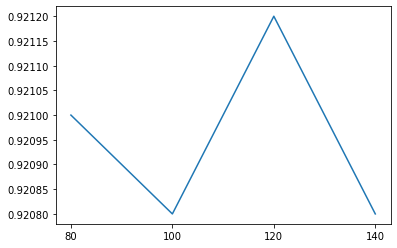

Optimal pca__n_components is 120
Performing Data Augmentation...


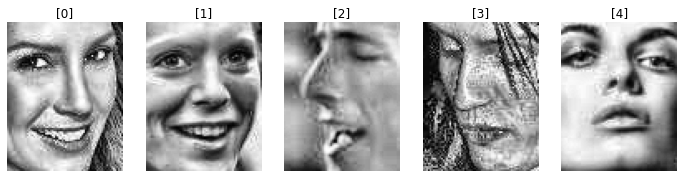

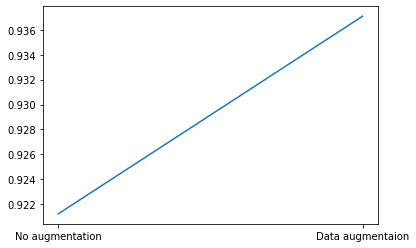

Performing final fit on all data with optimal params...
Accuracy on trained data: 98.93%


In [256]:
model = options.value
print(f"Accuracy on trained data: {model.fit(X, y):.2%}")

In [257]:
y_pred = model.predict(X_test)
print(f"Accuracy on test data: {(y_test==y_pred).mean():.2%}")

Accuracy on test data: 94.90%


In [ ]:
utils.show_wrong(X_test, y_test, y_pred)

In [253]:
import importlib
importlib.reload(A1)

<module 'A1.models' from '/Users/marc/Projects/AMLS_assignment22_23/A1/models.py'>